In [19]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix
#from wordcloud import WordCloud, STOPWORDS
#from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Desktop/Training/Datasets/Week13/Restaurant_Reviews.tsv', sep = '\t')

In [21]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [22]:
text = data['Review']

In [23]:
text_data = []

for i in range(len(text)):
    review = text[i].lower()
    
    review = re.sub('[\d]', ' ', review)
    
    ps = PorterStemmer()
    
    review = [ps.stem(i) for i in word_tokenize(review) if i not in stopwords.words('english')]
    
    review = ' '.join(review)
    
    text_data.append(review)

In [24]:
text_data[:5]

['wow ... love place .',
 'crust good .',
 'tasti textur nasti .',
 'stop late may bank holiday rick steve recommend love .',
 'select menu great price .']

In [25]:
cv = CountVectorizer()

In [26]:
text_data[2]

'tasti textur nasti .'

In [27]:
X = cv.fit_transform(text_data).toarray()
y = data['Liked'].values

In [29]:
print(len(cv.get_feature_names()))


1589
['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'al', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'and', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batte

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 1589), (300, 1589), (700,), (300,))

In [32]:
def model(X_train, y_train, X_test, y_test):
    classification_algos = {'DecisionTreeClassifier': DecisionTreeClassifier(),
                            'RandomForestClassifier': RandomForestClassifier(),
                            'Support Vector Classifier': SVC(),
                            'KNeighborsClassifier': KNeighborsClassifier(),
                            'MultinomialNB': MultinomialNB(),
                            'GaussianNB': GaussianNB(),
                            'BernoulliNB': BernoulliNB()}
    
    best_classifier = {'obj':0, 'accuracy': 0}
    
    t = PrettyTable(['Algorithms', 'Accuracy'])
    for key, model in classification_algos.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        t.add_row([key, accuracy_score(y_test, y_pred)])
        
        sea.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'summer')
        plt.title(key, pad = 15)
        plt.show()
        
        if accuracy_score(y_test, y_pred) > best_classifier['accuracy']:
            best_classifier['obj'] = model
            best_classifier['accuracy'] = accuracy_score(y_test, y_pred)
            
    print(t)
    return best_classifier['obj']

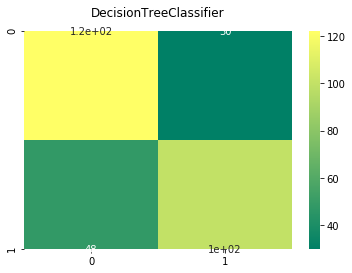

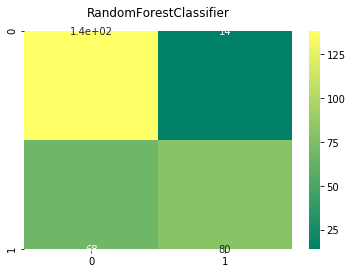

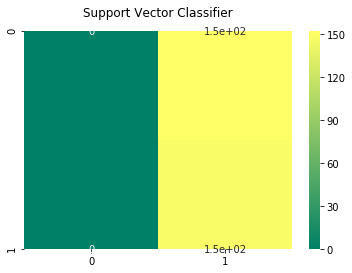

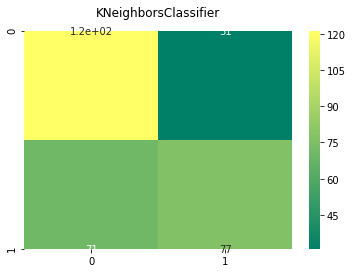

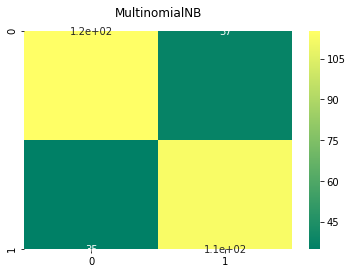

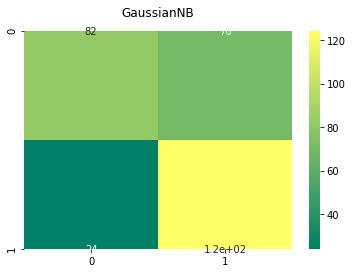

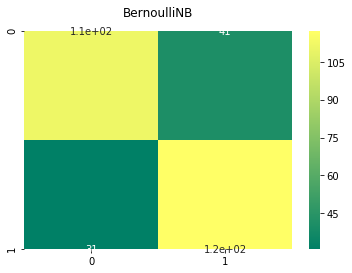

+---------------------------+---------------------+
|         Algorithms        |       Accuracy      |
+---------------------------+---------------------+
|   DecisionTreeClassifier  |         0.74        |
|   RandomForestClassifier  |  0.7266666666666667 |
| Support Vector Classifier | 0.49333333333333335 |
|    KNeighborsClassifier   |         0.66        |
|       MultinomialNB       |         0.76        |
|         GaussianNB        |  0.6866666666666666 |
|        BernoulliNB        |         0.76        |
+---------------------------+---------------------+


In [33]:
best_classifier = model(X_train, y_train, X_test, y_test)

## Testing the model with a sample text

In [34]:
sample = 'it was fantastic'

In [35]:
review = sample.lower()

review = re.sub('[\d]', ' ', review)

ps = PorterStemmer()

review = [ps.stem(i) for i in word_tokenize(review) if i not in stopwords.words('english')]

review = ' '.join(review)

review = cv.transform([review]).toarray()

In [36]:
result = best_classifier.predict(review)

if result == 1:
    print('Positive Comment')
else:
    print('Negative Comment')

Positive Comment
